In [70]:
import igraph as gr
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import networkx as nx
import math
from scipy.stats import genextreme as gev
import scipy.optimize


In [2]:
G = gr.Graph.Famous("zachary")
V = G.vcount()
E = G.ecount()

In [3]:
# Graph routines to calculate isolation and vulnerability index
def isolation(g):
    order = g.vcount()
    infinities = []
    for i in range(0, order):
        graph_copy = g.copy()
# will contain the edge's ids (the ones that will be removed)
        del_list = []
        for target_vertex_id in range(0, order):
            try:
                # Gets the id of the edge that belongs to the pair of vertices
                # (i,target_vertex_id) and puts it in 'del_list'
                del_list.append(graph_copy.get_eid(i, target_vertex_id))
            except:
                pass  # in case the id does not exist
        # deletes all edges connected to the node i
        graph_copy.delete_edges(del_list)
        components_sizes = graph_copy.components().sizes()
        count = 0
        # looping through all components and counting unreachable pairs of
        # vertices in newly modified graph
        total = order
        for c in components_sizes:
            total = total - c
            count += 2*c*total
        infinities.append(count)
    return infinities


def global_efficiency(g):
    invcam = 0
    n = g.vcount()
    global_efficiencies = []
    # returns a list with all shortest paths from each vertex
    shortest_paths = g.shortest_paths_dijkstra()
    for vertex_paths in shortest_paths:
        # iterates on each single shortest path
        for shortest_path in vertex_paths:
            if shortest_path != 0:
                # acumulates the efficiency of each pair of nodes
                invcam += 1 / shortest_path
    # Calculates global efficiency
    eg = invcam / (n * (n - 1))
    global_efficiencies.append(eg)
    return eg


def vulnerability(g):
    vulnerabilities = []
    # Eficiencia com o vertice
    eg = global_efficiency(g)
    # Eficiencia sem o vertice
    # iterating for all vertices
    order = g.vcount()
    for i in range(0, order):
        # makes a copy of the original graph
        g2 = g.copy()
# lista que conterá os ids das arestas do vértice 'i' que serão removidas.
        del_list = []
        for target_vertex_id in range(0, order):
            try:
                # Gets the id of the edge that belongs to the pair of
                # vertices(i,target vertex_id) and puts it in 'del_list'
                del_list.append(g2.get_eid(i, target_vertex_id))
            except:
                pass  # In case the id does not exist
        # deletes all edges of connected to the vertex i
        g2.delete_edges(del_list)
        # gets the efficiency
        efi = global_efficiency(g2)
        # calculates vulnerability
        v = (eg - efi) / eg
        vulnerabilities.append(v)
    return vulnerabilities

def communicability_local(G, p, q, qtd = 20):
    X = G.get_adjacency(2).data
    AUX = np.copy(X)
    G_pq = 0
    for i in range(qtd):
        AUX = np.matmul(AUX, X)
        G_pq += AUX[p][q]/math.factorial(i)
    return G_pq

def communicability_global(G, qtd = 20):
    all_comm = []
    for i in range(G.vcount()):
        for j in range(G.vcount()):
            all_comm.append(communicability_local(G, i, j, qtd))
    return sum(all_comm)/(G.vcount()*(G.vcount())-1)

def vulnerability_comm(G, qtd = 20):
    vul_list = []
    comm = communicability_global(G)
    for i in range(G.vcount()):
        H = G.copy()
        H.delete_edges(H.get_inclist()[i])
        vul_list.append((comm - communicability_global(H))/comm)
    return vul_list

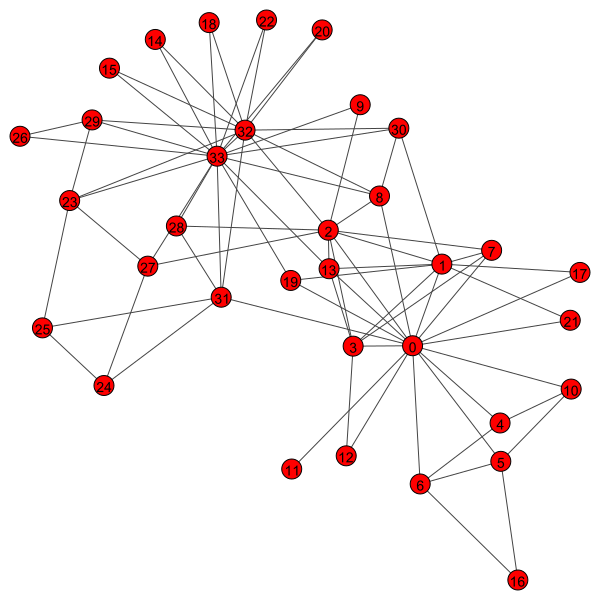

In [4]:
layout = G.layout("kk")
G.vs["label"] = range(V)
gr.plot(G, "karate2.png" ,layout=layout)
# Graph visualization


In [5]:
# Degree to each vertex
G.degree()

[16,
 9,
 10,
 6,
 3,
 4,
 4,
 4,
 5,
 2,
 3,
 1,
 2,
 5,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 5,
 3,
 3,
 2,
 4,
 3,
 4,
 4,
 6,
 12,
 17]

In [6]:
# Mean degree to entire graph
sum(G.degree())/V

4.588235294117647

In [7]:
# Centrality to each vertex
G.closeness()

[0.5689655172413793,
 0.4852941176470588,
 0.559322033898305,
 0.4647887323943662,
 0.3793103448275862,
 0.38372093023255816,
 0.38372093023255816,
 0.44,
 0.515625,
 0.4342105263157895,
 0.3793103448275862,
 0.36666666666666664,
 0.3707865168539326,
 0.515625,
 0.3707865168539326,
 0.3707865168539326,
 0.28448275862068967,
 0.375,
 0.3707865168539326,
 0.5,
 0.3707865168539326,
 0.375,
 0.3707865168539326,
 0.39285714285714285,
 0.375,
 0.375,
 0.3626373626373626,
 0.4583333333333333,
 0.4520547945205479,
 0.38372093023255816,
 0.4583333333333333,
 0.5409836065573771,
 0.515625,
 0.55]

In [8]:
# Mean centrality to the entire graph
c_mean = sum(G.closeness())/V
c_mean

0.4264796325735234

In [9]:
# Shortest paths matrix
np.matrix(G.shortest_paths())

matrix([[0, 1, 1, ..., 1, 2, 2],
        [1, 0, 1, ..., 2, 2, 2],
        [1, 1, 0, ..., 2, 1, 2],
        ...,
        [1, 2, 2, ..., 0, 1, 1],
        [2, 2, 1, ..., 1, 0, 1],
        [2, 2, 2, ..., 1, 1, 0]])

In [10]:
# Minimun shortest path mean to each vertex
min_short = [sum(i)/(V-1) for i in (G.shortest_paths())]
min_short

[1.7575757575757576,
 2.0606060606060606,
 1.7878787878787878,
 2.1515151515151514,
 2.6363636363636362,
 2.606060606060606,
 2.606060606060606,
 2.272727272727273,
 1.9393939393939394,
 2.303030303030303,
 2.6363636363636362,
 2.727272727272727,
 2.696969696969697,
 1.9393939393939394,
 2.696969696969697,
 2.696969696969697,
 3.515151515151515,
 2.6666666666666665,
 2.696969696969697,
 2.0,
 2.696969696969697,
 2.6666666666666665,
 2.696969696969697,
 2.5454545454545454,
 2.6666666666666665,
 2.6666666666666665,
 2.757575757575758,
 2.1818181818181817,
 2.212121212121212,
 2.606060606060606,
 2.1818181818181817,
 1.8484848484848484,
 1.9393939393939394,
 1.8181818181818181]

In [11]:
# Mean shortest path to the entire graph
l_mean = G.average_path_length(directed=False)
l_mean

2.408199643493761

In [12]:
# Graph's diameter
G.diameter(directed=False)

5

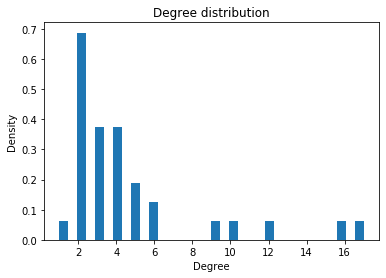

In [13]:
# Plotting the degree distribution as a histogram
plt.figure()
plt.title("Degree distribution")
plt.ylabel("Density")
plt.xlabel("Degree")
plt.hist(G.degree(), bins = V, density = True)
plt.show()

In [14]:
# Centrality to a random graph with the same amount of edges and vertexes
random_net_c = 2*E/(V**2)
random_net_c

0.13494809688581316

In [15]:
# Average path to a random graph with the same amount of edges and vertexes
random_net_l = np.log(V)/(np.log(2*E/V))
random_net_l

2.3146511196218422

In [16]:
# comparing the real one with the similar random one
c_mean > random_net_c

True

In [17]:
l_mean > random_net_l

True

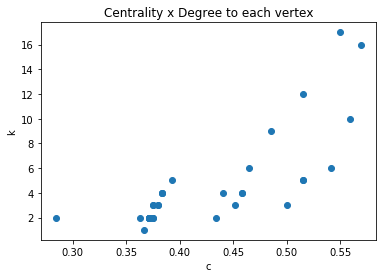

In [18]:
# Plot of centrality x degree to each vertex
plt.plot(G.closeness(), G.degree(), 'o')
plt.title("Centrality x Degree to each vertex")
plt.xlabel("c")
plt.ylabel("k")
plt.show()

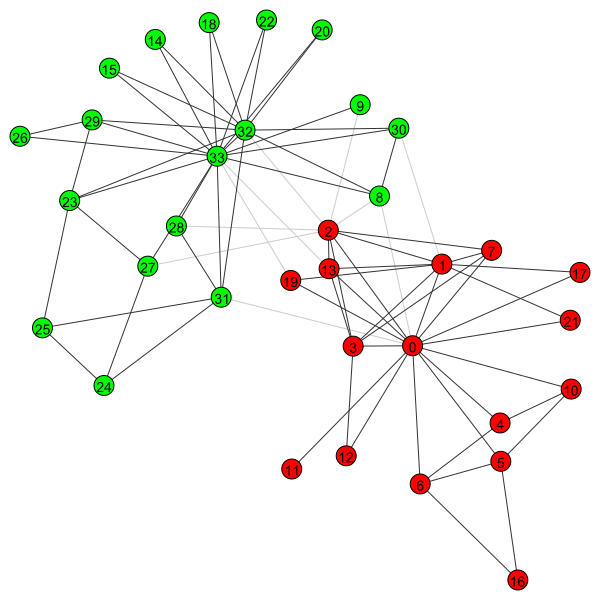

In [19]:
# Community detection via walktrap algorithm
comm = G.community_leading_eigenvector(2)
gr.plot(comm)

In [20]:
# Graph modularity
G.modularity(comm)

0.37146614069691

In [21]:
# Amount of comunities
len(comm)

2

In [22]:
iso = []
vul = []
iso = isolation(G)
vul1 = vulnerability(G)
vul = [round(i, 6) for i in vul1]
convert = G.get_edgelist()
GNX = nx.Graph(convert)
cmap = plt.cm.rainbow
facecolor = "gainsboro"

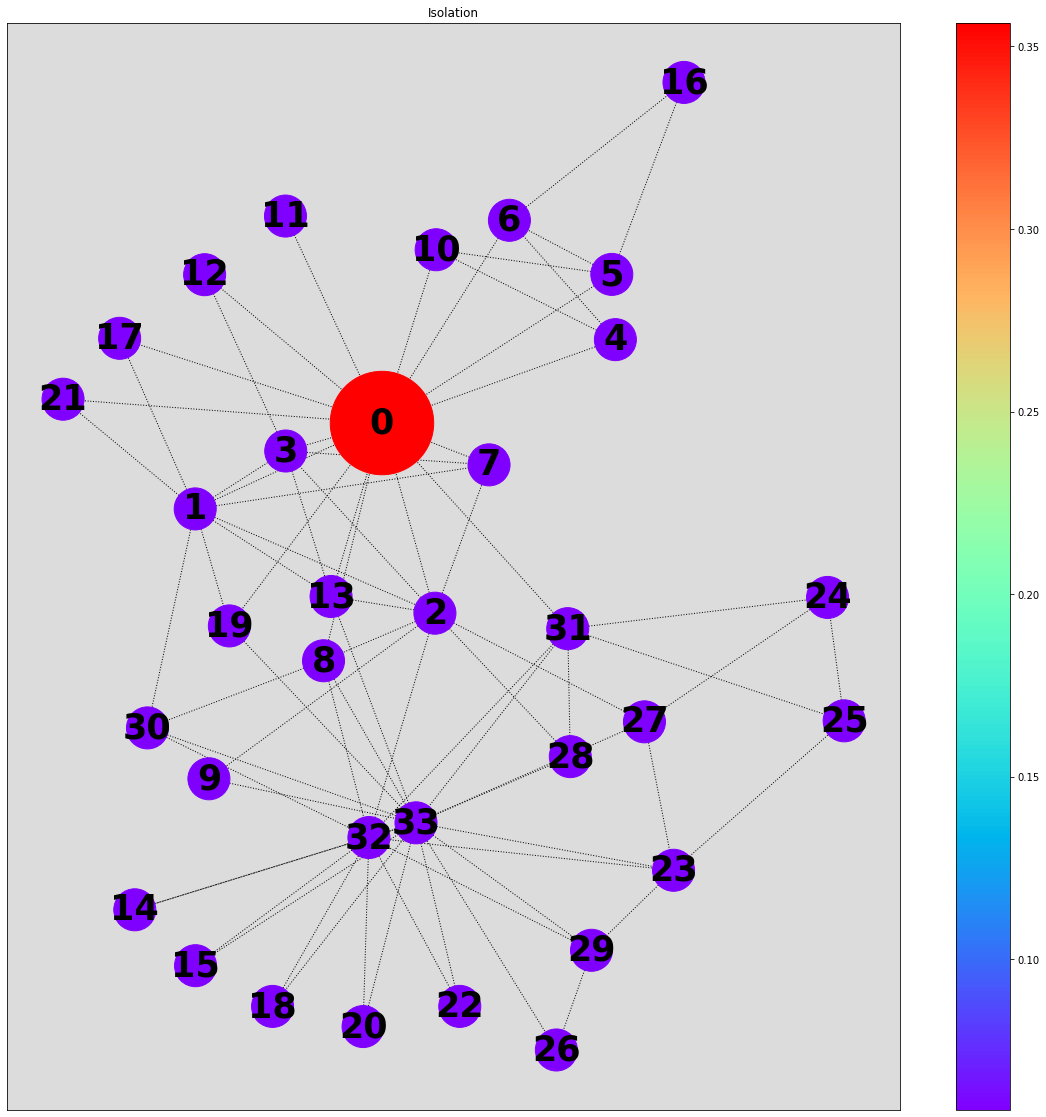

In [23]:
normiso = [float(i)/(V*(V-1)) for i in iso]
norm = matplotlib.colors.Normalize(vmin=min(normiso), vmax=max(normiso))
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_facecolor(facecolor)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # only needed for matplotlib < 3.1
fig.colorbar(sm)
plt.title("Isolation")
nx.draw_networkx(GNX, pos=nx.kamada_kawai_layout(GNX), cmap='rainbow',
                 node_color=normiso, node_size=30000*np.array(normiso),
                 font_color='black', style='dotted', font_weight='heavy',
                 font_size=35)
plt.show()
#Isolation plot

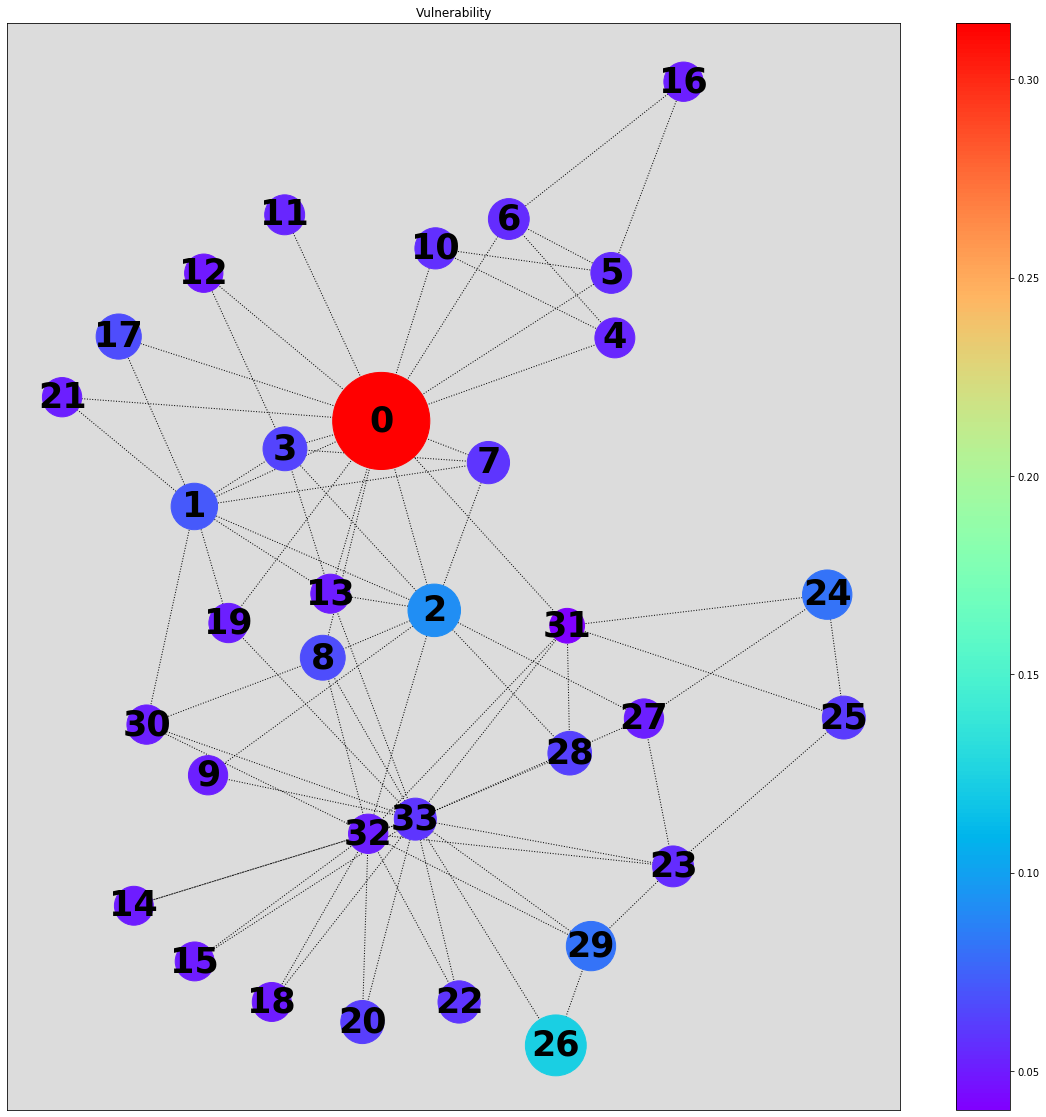

In [24]:
cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=min(vul), vmax=max(vul))
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_facecolor(facecolor)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # only needed for matplotlib < 3.1
fig.colorbar(sm)
plt.title("Vulnerability")
nx.draw_networkx(GNX, pos=nx.kamada_kawai_layout(GNX), cmap='rainbow',
                 node_color=vul, node_size=30000*np.array(vul),
                 font_color='black', style='dotted',
                 font_weight='heavy', font_size=35)
plt.show()
# Vulnerablity plot

In [36]:
vul = vulnerability_comm(G)

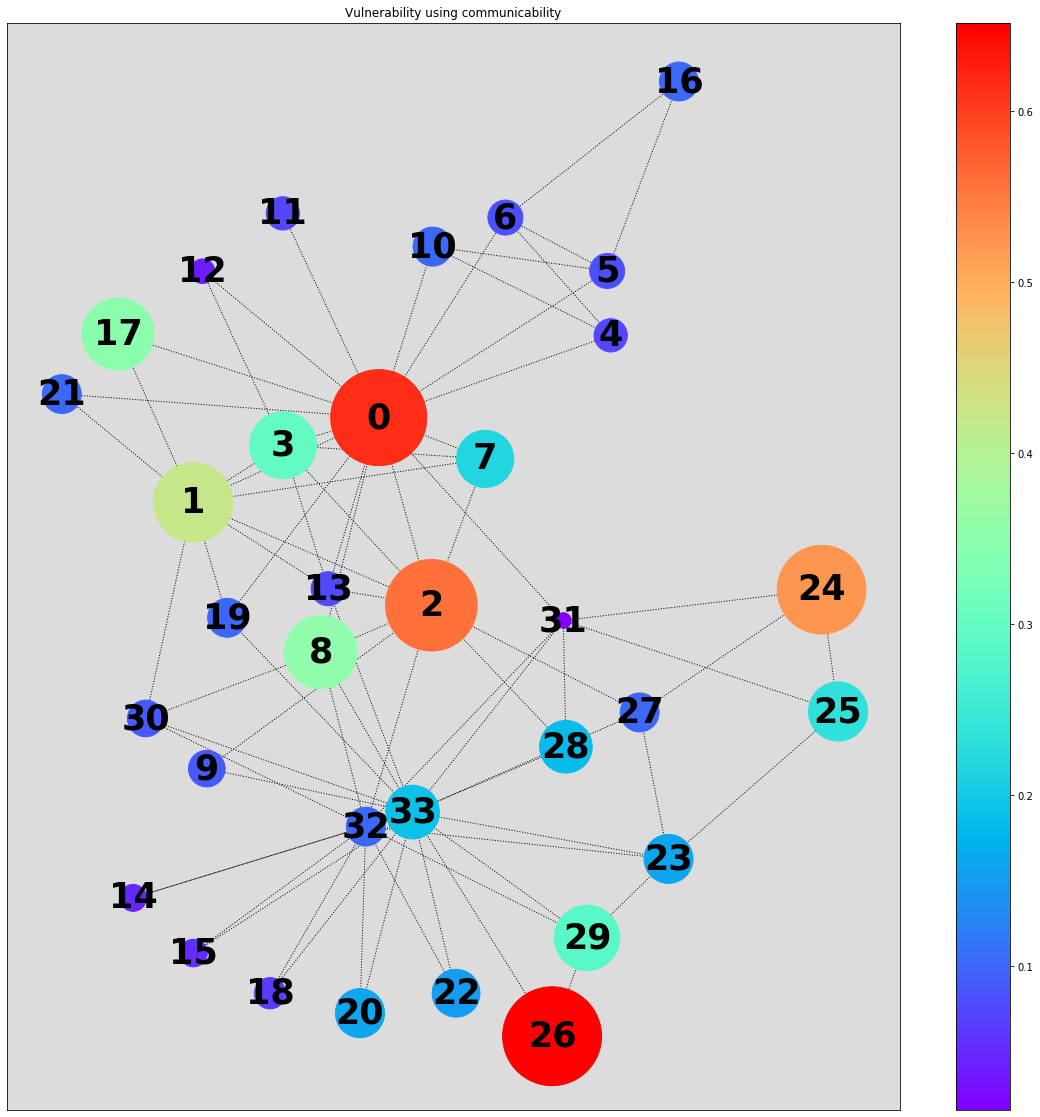

In [37]:
facecolor = "gainsboro"
cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=min(vul), vmax=max(vul))
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_facecolor(facecolor)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # only needed for matplotlib < 3.1
fig.colorbar(sm)
plt.title("Vulnerability using communicability")
nx.draw_networkx(GNX, pos=nx.kamada_kawai_layout(GNX), cmap='rainbow',
                 node_color=vul, node_size=15000*np.array(vul),
                 font_color='black', style='dotted',
                 font_weight='heavy', font_size=35)
plt.show()

# Random Walks

In [66]:
def random_walk1(G, qtd=10000, steps=100, start=0, finish=1):
    def most_frequent(x, short):
        vl = np.zeros(max(x))
        for i in x:
            vl[i-1]+=1
        if short > 1:
            return list(vl).index(max(vl)) - 1
        else:
            return list(vl).index(max(vl))
    G = gr.Graph.Famous("zachary")
    freq = []
    x = range(G.shortest_paths(start, finish)[0][0], steps)
    for i in range(qtd):
        walk = G.random_walk(start, steps)
        if finish in walk:
            freq.append(walk.index(finish))
    short = G.shortest_paths_dijkstra(start, finish)[0][0]
    plt.title(f"De {start} para {finish}, depois de {qtd} caminhadas")
    plt.ylabel("Probabilidade")
    plt.xlabel("Tamanho da caminhada")
    ypoints=[min(freq) + (i/(steps-short)) * (max(freq)-min(freq)) for i in range(short, steps)]
    c, loc, scale = gev.fit(freq)
    mean, var, skew, kurt = gev.stats(c, moments = "mvsk")
    rv_gev = gev(c, loc=loc, scale=scale)
    gev_pdf = rv_gev.pdf(ypoints)
    n, bins, patches = plt.hist(freq, bins = 100, density = True, label="freq")
    plt.plot(range(short, 100), gev_pdf, label="gev")
    plt.legend()
    plt.show()
    print(f'Most frequent walk: {most_frequent(freq, short)+short} shortest path: {short}' )

def random_walk2(G, qtd=10000, steps=100, start=0, finish=1):
    y = []
    summing = [0]
    x = range(G.shortest_paths(start, finish)[0][0], steps)
    for i in x:
        freq = []
        for j in range(qtd):
            freq.append(G.random_walk(start, i)[-1])
        y.append(freq.count(finish)/qtd)
        summing.append(summing[-1] + freq.count(finish)/((len(summing)+1)*qtd))

    summing.pop(0)

    plt.figure()
    plt.title(f"Porcentagem das vezes que a caminhada\n aleatória leva ao destino")
    plt.xlabel("Quantidade de passos")
    plt.ylabel("Frequência")
    plt.plot(x, y, label="data")
    plt.legend()
    plt.show()


    fit = scipy.optimize.curve_fit(lambda t,a,b: a+b*np.log(t),  x,  summing)
    yy = [(fit[0][0]+fit[0][1]*i) for i in np.log(x)]
    plt.figure()
    plt.title(f"Chance que a caminhada aleatória tem de chegar no\n destino acumulando os passos\n {str(fit[0][0])[:6]} + {str(fit[0][1])[:4]}*log(x)")
    plt.xlabel("Quantidade de passos")
    plt.ylabel("Chance de aparecer na somatória")
    plt.plot(x, yy, label = "fit")
    plt.plot(x, summing, label = "data")
    plt.legend()
    plt.show()

C:\Users\gio-x\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2594: RuntimeWarning: invalid value encountered in power
  np.sign(c)*(-g3 + (g2 + 2*g2mg12)*g1)/g2mg12**1.5,


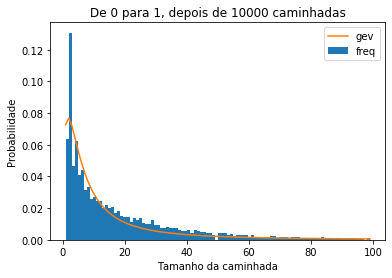

Most frequent walk: 2 shortest path: 1


In [67]:
random_walk1(G)

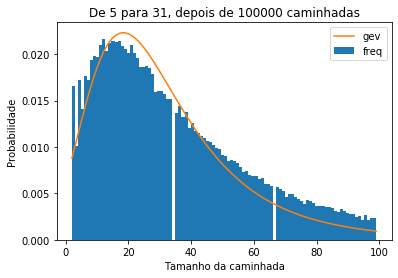

Most frequent walk: 12 shortest path: 2


In [68]:
random_walk1(G, qtd = 100000, start=5, finish=31)

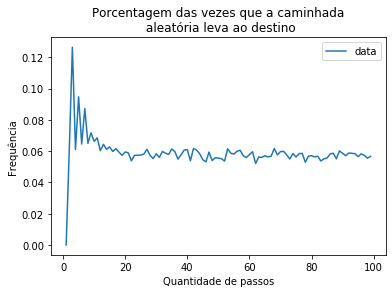

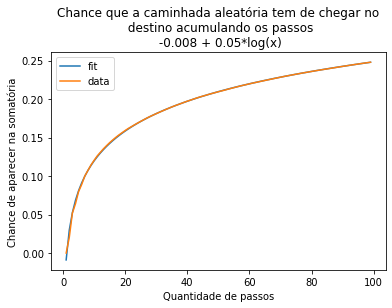

In [71]:
random_walk2(G)

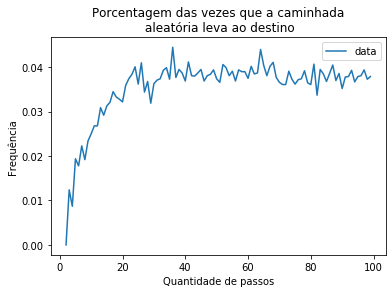

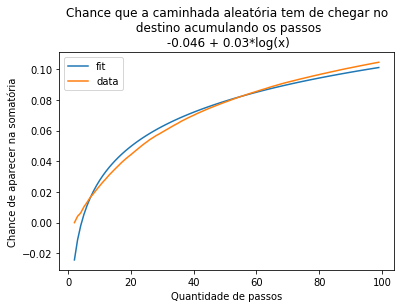

In [72]:
random_walk2(G, start = 5, finish = 31)